# Importing the Necessary Libraries

In [38]:
import numpy as np
import pandas as pd
from sklearn import datasets
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import time
from sklearn.preprocessing import StandardScaler



# Lets try our hands on a small Dataset

In [39]:
##loading the datset
df = datasets.load_iris()
df = pd.DataFrame(data=df.data, columns=df.feature_names)
print(df.head())
print("The column names are: ")
print( df.columns)
print(df.shape)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
The column names are: 
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
(150, 4)


In [40]:
irisD=datasets.load_iris()
print(irisD.data)
print(irisD.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# KNN Implementation

In [41]:
class KNN:
    def __init__(self, k=3):
        self.k = k
    ##k value can range betwen 2 and 5.
    def fitData(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return [self._predict(x) for x in X]

    def _predict(self, x):
      ##1. compute the distance(euclidean)
        distances = self._euclideanDistance(x)
        ##2. Now we need the closest k
        k_indices = np.argsort(distances)[:self.k]##k is defined as 3 above
        k_nearest_labels = self.y_train[k_indices]
        ##3. now for a given point we will do majority voting as to which class it belongs to.
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def _euclideanDistance(self, x):
        return np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
'''
Here, we need have 2 points and we need to calculate the distance between them.
Euclidean Distance, Manhattan Distance etc.
We will go with euclidean distance
'''

'\nHere, we need have 2 points and we need to calculate the distance between them.\nEuclidean Distance, Manhattan Distance etc.\nWe will go with euclidean distance\n'

In [42]:
##lets run KNN on iris dataset
X,y = irisD.data, irisD.target
print(X[0])
#print(y) ##there are 3 classes/neighbours for a new point(0,1 and 2) to which it can belong to.
print(np.unique(y))
print(np.bincount(y)) ##count of each class/group

[5.1 3.5 1.4 0.2]
[0 1 2]
[50 50 50]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2,random_state=666)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


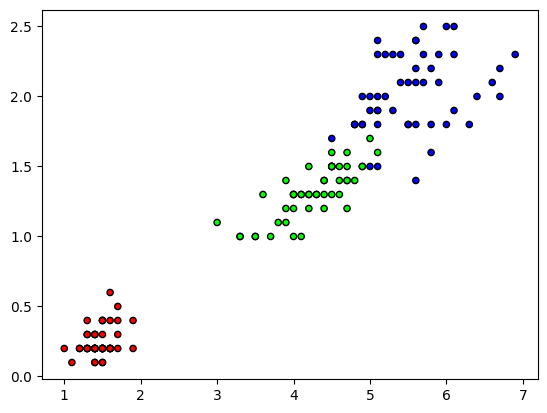

In [44]:
##let us for once visualize these data points
cmap=ListedColormap(['#FF0000','#00FF00','#0000FF'])
plt.figure()
plt.scatter(X[:,2], X[:,3], c=y, cmap=cmap, edgecolors='k',s=20)

In [45]:
##lets train the data on KNN
model = KNN(k=5)
model.fitData(X_train, y_train)
predictions=model.predict(X_test)
print(predictions)

[1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2]


In [46]:
##lets get the accuracies
accuracy = (np.sum(predictions==y_test)/len(y_test))*100
print(accuracy)

100.0


In [48]:
print("The columns are",df.columns)
print("their corresponding values are ",irisD.data[69])
print("the target/label is ", irisD.target[69])

The columns are Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
their corresponding values are  [5.6 2.5 3.9 1.1]
the target/label is  1


The above code was taken as a reference from: https://youtu.be/rTEtEy5o3X0

# Defining Functions for loading data and evaluating features.




In [47]:
def load_data(file_path):
    return np.loadtxt(file_path)

def evaluate_features(feature_subset, dataset, knn):
    X = dataset[:, feature_subset]
    y = dataset[:, 0]

    knn.fitData(X, y)

    start_time = time.time()
    predictions = knn.predict(X)
    accuracy = np.mean(predictions == y)
    elapsed_time = time.time() - start_time

    return accuracy, elapsed_time


# Forward Feature Search

In [49]:
##Now we will start from feature 1 and keep on adding more feature to it.
'''
we will go something like this
1 feature -> 2 features -> 3 features -> 4 features
This is usually done to get the best features from a dataset,
as the dataset might have some redundant features as well.
Solution? PCA, maybe.
It helps in dimensionality reduction but may not yield better features.
Any other solution ? To the Rescue: Forward selection
what is it?
For every feature see the corresponding score it can get.
Now we will keep on building our features and select those features that will
give the maximum score.
Example: Select f1 then take the next f2, then next and find the features
that give the optimal result.
..THIS IS FORWARD SEARCH..
'''
def forward_feature_search(n, dataset, early_stop_threshold=0.01):
    current_set = []
    best_acc = 0
    best_set = []
    accuracies = []

    knn = KNN()

    print(f'The number of features in this dataset are: {n}')
    print('---------------------------------------------------------------')
    startTime=time.time()
    for i in range(n):
        max_accuracy = -np.inf
        feature_to_add = None
        print(f'Level {i+1} of the search tree')
        for j in range(1, n+1):
            if j not in current_set:
                accuracy, elapsed_time = evaluate_features(current_set + [j], dataset, knn)
                print(f'Consider adding the feature {j} accuracy is {accuracy}')
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    feature_to_add = j
        current_set.append(feature_to_add)
        print(f'On level {i+1} Added feature: {feature_to_add} to the set')
        print('---------------------------------------------------------------')
        print(f'Current set of features: {current_set} with accuracy {max_accuracy}')
        accuracies.append(max_accuracy)  # store accuracy

        if max_accuracy - best_acc < early_stop_threshold and i > 0:  # early stopping check
            print(f'Improvement of {max_accuracy - best_acc} is less than {early_stop_threshold}, stopping early.')
            break

        best_acc = max_accuracy
        best_set = current_set.copy()
    endTime=time.time()
    WhatTime=endTime-startTime
    print(f'The time taken for this forward search is: {WhatTime} seconds')

    ##plotting the graphs
    plt.plot(range(1, len(accuracies)+1), accuracies, marker='o')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for Forward Feature Selection')
    plt.show()

    return best_set, best_acc


# Backward Elimination

In [50]:
##Now let us define the backward feature selection technique
'''
Generally we use this if we have less features.
f1-f49 then f1-f48 and so on....
Here we take all features remove >=1 featrure and see the score.
For Example for the iris dataset we can evaluate it on:
1. Score = f1+f2+f3+f4
2. score = f1+f2+f3
3. score = f1+f2+f4
4. score = f1+f3+f4
5. score = f2+f3+f4
..
.. and so on
'''
def backward_feature_search(n, dataset):
    current_set = set(range(1, n+1))
    best_acc = 0
    best_set = current_set.copy()
    elapsed_times = []  # To store elapsed times

    knn = KNN()
    startTime=time.time()
    print(f'The number of features in this dataset are: {n}')
    print('---------------------------------------------------------------')
    print(f'First set of features: {current_set} with accuracy {best_acc}')

    for i in range(n):
        max_accuracy = -np.inf
        feature_to_remove = None
        print(f'Level {i+1} of the search tree')
        for j in range(1, n+1):
            if j in current_set:
                accuracy, elapsed_time = evaluate_features(list(current_set - {j}), dataset, knn)
                print(f'Consider deleting the feature {j} accuracy is {accuracy}')
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    feature_to_remove = j
        current_set.remove(feature_to_remove)
        elapsed_times.append(elapsed_time)  # Append elapsed time after each feature is removed
        print(f'On level {i+1} deleted feature: {feature_to_remove} from the set')
        print('---------------------------------------------------------------')
        print(f'Current set of features: {current_set} with accuracy {max_accuracy}')

        if max_accuracy > best_acc:
            best_acc = max_accuracy
            best_set = current_set.copy()
    endTime=time.time()
    WhatTime=endTime-startTime
    print(f'The time taken for this backward search is: {WhatTime} seconds')

    # Plotting
    plt.plot(range(1, n+1), elapsed_times, marker='o')
    plt.xlabel('Number of Features')
    plt.ylabel('Elapsed Time (seconds)')
    plt.title('Elapsed Time for Feature Selection')
    plt.show()

    return list(best_set), best_acc

# Lets Do it

---------------------------------------------------------------
Dataset Choices:
1. Small dataset
2. Large dataset
3. XXX Large dataset
0. Exit
1. Forward Search
2. Backward Search
0. Exit
The number of features in this dataset are: 10
---------------------------------------------------------------
Level 1 of the search tree
Consider adding the feature 1 accuracy is 0.857
Consider adding the feature 2 accuracy is 0.871
Consider adding the feature 3 accuracy is 0.837
Consider adding the feature 4 accuracy is 0.856
Consider adding the feature 5 accuracy is 0.849
Consider adding the feature 6 accuracy is 0.853
Consider adding the feature 7 accuracy is 0.861
Consider adding the feature 8 accuracy is 0.922
Consider adding the feature 9 accuracy is 0.85
Consider adding the feature 10 accuracy is 0.844
On level 1 Added feature: 8 to the set
---------------------------------------------------------------
Current set of features: [8] with accuracy 0.922
Level 2 of the search tree
Consider addin

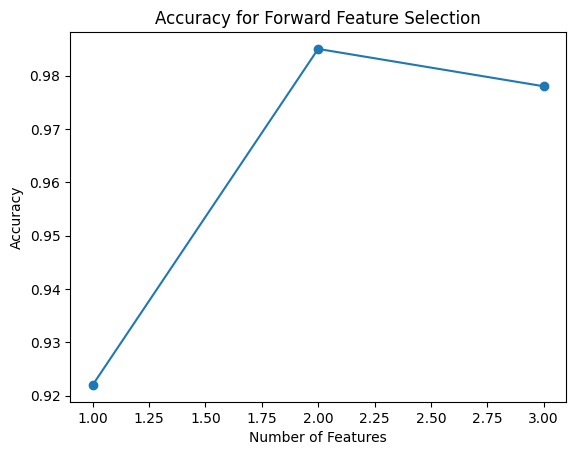

Best set is [8, 2] with accuracy 0.985
---------------------------------------------------------------
Dataset Choices:
1. Small dataset
2. Large dataset
3. XXX Large dataset
0. Exit
1. Forward Search
2. Backward Search
0. Exit
The number of features in this dataset are: 10
---------------------------------------------------------------
First set of features: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10} with accuracy 0
Level 1 of the search tree
Consider deleting the feature 1 accuracy is 0.904
Consider deleting the feature 2 accuracy is 0.889
Consider deleting the feature 3 accuracy is 0.919
Consider deleting the feature 4 accuracy is 0.917
Consider deleting the feature 5 accuracy is 0.912
Consider deleting the feature 6 accuracy is 0.914
Consider deleting the feature 7 accuracy is 0.916
Consider deleting the feature 8 accuracy is 0.868
Consider deleting the feature 9 accuracy is 0.924
Consider deleting the feature 10 accuracy is 0.917
On level 1 deleted feature: 9 from the set
-------------------

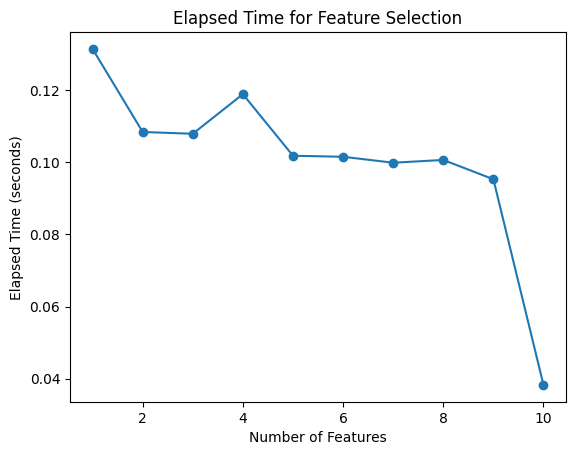

Best set is [8, 2] with accuracy 0.985
---------------------------------------------------------------
Dataset Choices:
1. Small dataset
2. Large dataset
3. XXX Large dataset
0. Exit
1. Forward Search
2. Backward Search
0. Exit
The number of features in this dataset are: 20
---------------------------------------------------------------
Level 1 of the search tree
Consider adding the feature 1 accuracy is 0.862
Consider adding the feature 2 accuracy is 0.8565
Consider adding the feature 3 accuracy is 0.854
Consider adding the feature 4 accuracy is 0.853
Consider adding the feature 5 accuracy is 0.861
Consider adding the feature 6 accuracy is 0.86
Consider adding the feature 7 accuracy is 0.8555
Consider adding the feature 8 accuracy is 0.8485
Consider adding the feature 9 accuracy is 0.851
Consider adding the feature 10 accuracy is 0.8515
Consider adding the feature 11 accuracy is 0.9235
Consider adding the feature 12 accuracy is 0.86
Consider adding the feature 13 accuracy is 0.854
Con

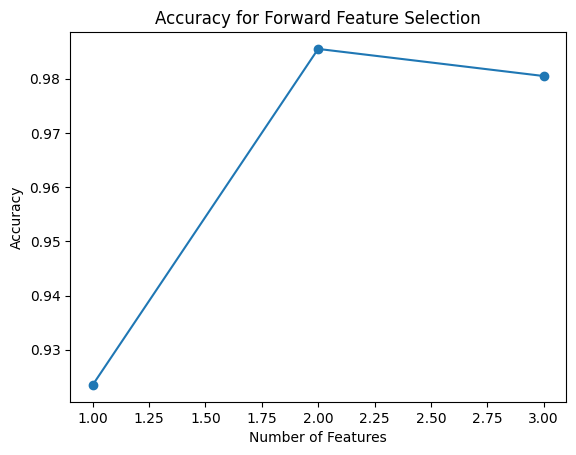

Best set is [11, 17] with accuracy 0.9855
---------------------------------------------------------------
Dataset Choices:
1. Small dataset
2. Large dataset
3. XXX Large dataset
0. Exit
1. Forward Search
2. Backward Search
0. Exit
The number of features in this dataset are: 20
---------------------------------------------------------------
First set of features: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20} with accuracy 0
Level 1 of the search tree
Consider deleting the feature 1 accuracy is 0.8755
Consider deleting the feature 2 accuracy is 0.877
Consider deleting the feature 3 accuracy is 0.878
Consider deleting the feature 4 accuracy is 0.873
Consider deleting the feature 5 accuracy is 0.878
Consider deleting the feature 6 accuracy is 0.874
Consider deleting the feature 7 accuracy is 0.888
Consider deleting the feature 8 accuracy is 0.879
Consider deleting the feature 9 accuracy is 0.878
Consider deleting the feature 10 accuracy is 0.8815
Consider deleting

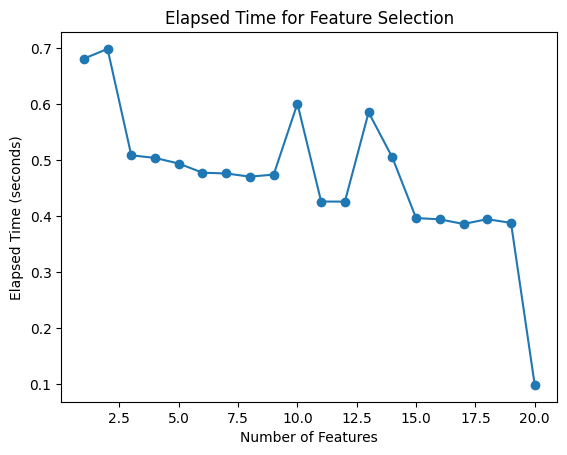

Best set is [17, 11] with accuracy 0.9855
---------------------------------------------------------------
Dataset Choices:
1. Small dataset
2. Large dataset
3. XXX Large dataset
0. Exit
1. Forward Search
2. Backward Search
0. Exit
The number of features in this dataset are: 80
---------------------------------------------------------------
Level 1 of the search tree
Consider adding the feature 1 accuracy is 0.855
Consider adding the feature 2 accuracy is 0.91775
Consider adding the feature 3 accuracy is 0.85175
Consider adding the feature 4 accuracy is 0.85025
Consider adding the feature 5 accuracy is 0.85125
Consider adding the feature 6 accuracy is 0.85475
Consider adding the feature 7 accuracy is 0.85275
Consider adding the feature 8 accuracy is 0.8495
Consider adding the feature 9 accuracy is 0.85325
Consider adding the feature 10 accuracy is 0.85875
Consider adding the feature 11 accuracy is 0.85
Consider adding the feature 12 accuracy is 0.8495
Consider adding the feature 13 accu

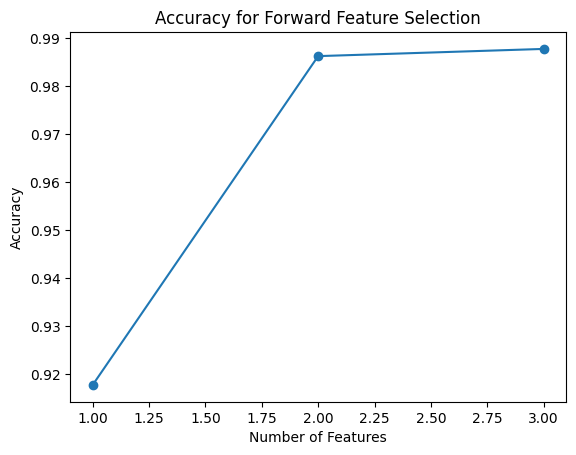

Best set is [2, 19] with accuracy 0.98625
---------------------------------------------------------------
Dataset Choices:
1. Small dataset
2. Large dataset
3. XXX Large dataset
0. Exit
1. Forward Search
2. Backward Search
0. Exit
The number of features in this dataset are: 80
---------------------------------------------------------------
First set of features: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80} with accuracy 0
Level 1 of the search tree
Consider deleting the feature 1 accuracy is 0.8545
Consider deleting the feature 2 accuracy is 0.84525
Consider deleting the feature 3 accuracy is 0.85
Consider deleting the feature 4 accuracy is 0.854
Consider deleting the feature 5 accuracy is 0.852
Consider deleting the featur

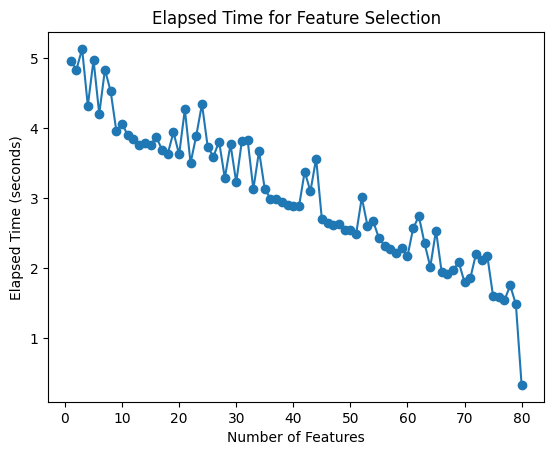

Best set is [2, 19] with accuracy 0.98625
---------------------------------------------------------------
Dataset Choices:
1. Small dataset
2. Large dataset
3. XXX Large dataset
0. Exit
Enter the dataset choice: 0


In [ ]:
def select_dataset(dataset_choice):
    filenames = {
        1: '/content/drive/MyDrive/AI_Datset/CS170_small_Data__1.txt',
        2: '/content/drive/MyDrive/AI_Datset/CS170_large_Data__1.txt',
        3: '/content/drive/MyDrive/AI_Datset/CS170_XXXlarge_Data__2.txt',
    }
    return load_data(filenames.get(dataset_choice, ''))

while True:
    print('---------------------------------------------------------------')
    print('Dataset Choices:')
    print('1. Small dataset')
    print('2. Large dataset')
    print('3. XXX Large dataset')
    print('0. Exit')
    dataset_choice = int(input('Enter the dataset choice: '))

    if dataset_choice == 0:
        break

    print('1. Forward Search')
    print('2. Backward Search')
    print('0. Exit')
    search_choice = int(input('Enter your choice: '))

    if search_choice == 0:
        break

    dataset = select_dataset(dataset_choice)
    n = dataset.shape[1] - 1

    if dataset is None:
        continue

    if search_choice == 1:
        best_features, best_acc = forward_feature_search(n, dataset)
    elif search_choice == 2:
        best_features, best_acc = backward_feature_search(n, dataset)
    else:
        print('Invalid choice. Please try again.')

    print('Best set is', best_features, 'with accuracy', best_acc)


# Lets TRY on Real World Data

In [51]:
data=pd.read_csv('/content/drive/MyDrive/AI_Datset/breast-cancer-wisconsin.csv')
data=data.drop(columns='id')
print(data.head())
print(data.shape)

'''
Here, we have 10 features and 1 target variable which is class 1 and 2;malignant or benign
'''

   clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  \
0                5                1                 1                  1   
1                5                4                 4                  5   
2                3                1                 1                  1   
3                6                8                 8                  1   
4                4                1                 1                  3   

   epithelial_size bare_nucleoli  bland_chromatin  normal_nucleoli  mitoses  \
0                2             1                3                1        1   
1                7            10                3                2        1   
2                2             2                3                1        1   
3                3             4                3                7        1   
4                2             1                3                1        1   

   class  
0      2  
1      2  
2      2  
3      2  
4      2  
(6

'\nHere, we have 10 features and 1 target variable which is class 1 and 2;malignant or benign\n'

In [52]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)


data = data.astype(float)
data.fillna(data.median(), inplace=True)

# Separate features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

dataset = np.column_stack((X, y))

****************************************************************
HERE WE ARE USING BREAST CANCER DATASET AS OUR REAL WORLD DATA
Please Select from the 2 choices provided below
1. Forward Search
2. Backward Search
0. Exit
Enter your choice: 1
The number of features in this dataset are: 9
---------------------------------------------------------------
Level 1 of the search tree
Consider adding the feature 1 accuracy is 0.18025751072961374
Consider adding the feature 2 accuracy is 0.1459227467811159
Consider adding the feature 3 accuracy is 0.17453505007153075
Consider adding the feature 4 accuracy is 0.15736766809728184
Consider adding the feature 5 accuracy is 0.21745350500715308
Consider adding the feature 6 accuracy is 0.17310443490701002
Consider adding the feature 7 accuracy is 0.16165951359084407
Consider adding the feature 8 accuracy is 0.18741058655221746
Consider adding the feature 9 accuracy is 0.13876967095851217
On level 1 Added feature: 5 to the set
-------------------------

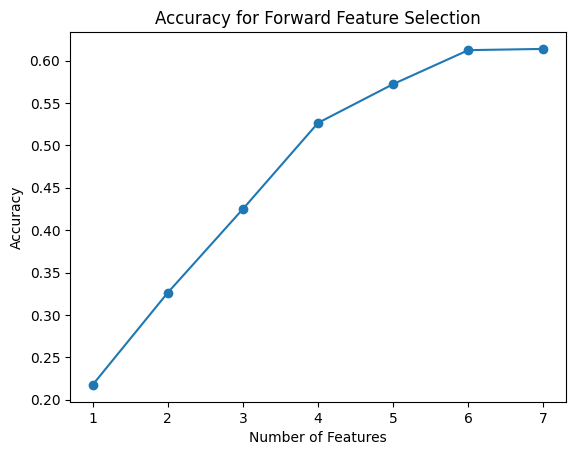

Best set is [5, 4, 6, 2, 3, 1] with accuracy 0.6123032904148784
****************************************************************
HERE WE ARE USING BREAST CANCER DATASET AS OUR REAL WORLD DATA
Please Select from the 2 choices provided below
1. Forward Search
2. Backward Search
0. Exit
Enter your choice: 2
The number of features in this dataset are: 9
---------------------------------------------------------------
First set of features: {1, 2, 3, 4, 5, 6, 7, 8, 9} with accuracy 0
Level 1 of the search tree
Consider deleting the feature 1 accuracy is 0.5593705293276109
Consider deleting the feature 2 accuracy is 0.5693848354792561
Consider deleting the feature 3 accuracy is 0.5793991416309013
Consider deleting the feature 4 accuracy is 0.580829756795422
Consider deleting the feature 5 accuracy is 0.5436337625178826
Consider deleting the feature 6 accuracy is 0.547925608011445
Consider deleting the feature 7 accuracy is 0.586552217453505
Consider deleting the feature 8 accuracy is 0.562231

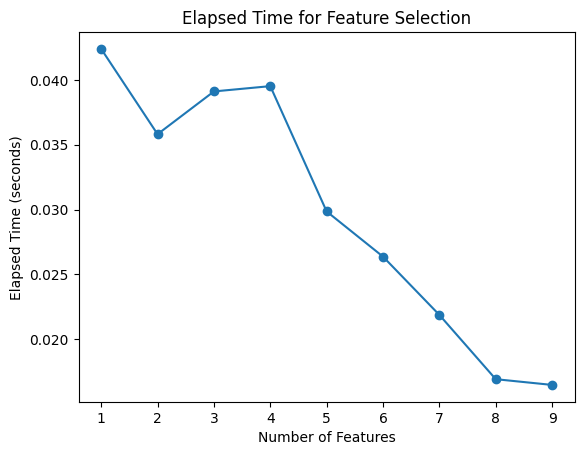

Best set is [1, 2, 3, 4, 5, 6, 8] with accuracy 0.6108726752503576
****************************************************************
HERE WE ARE USING BREAST CANCER DATASET AS OUR REAL WORLD DATA
Please Select from the 2 choices provided below
1. Forward Search
2. Backward Search
0. Exit
Enter your choice: 0


In [53]:
n = dataset.shape[1] - 1
while True:
  print('****************************************************************')
  print('HERE WE ARE USING BREAST CANCER DATASET AS OUR REAL WORLD DATA')
  print('Please Select from the 2 choices provided below')
  print('1. Forward Search')
  print('2. Backward Search')
  print('0. Exit')
  search_choice = int(input('Enter your choice: '))

  if search_choice == 0:
    break

  if search_choice == 1:
    best_features, best_acc = forward_feature_search(n, dataset)
  elif search_choice == 2:
    best_features, best_acc = backward_feature_search(n, dataset)
  else:
    print('Invalid choice. Please try again.')

  print('Best set is', best_features, 'with accuracy', best_acc)




# Mounting Google Drive

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
